### Table of contents
01. Importing Libraries and Importing Data Set
02. Cleaning
03. Wrangling
04. Plotting
05. Exporting



# 01. Importing Libraries and Data Sets

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import math
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [215]:
# scd is successful, canceled and diverted flight data frame which has all of arrival and departed time data removed due to NaN values through out canceled and diverted.
scd = pd.read_csv('/Users/tuor/DA Projects/230523 Airline January 2023 Project/02 Data/Prepared Data/230530 2019 SCD flights.csv')

In [216]:
# cleaned flight data with all NaN values removed which inadvertantly removes all cancelled and diverted flights. Delays can still be assessed
delays = pd.read_csv('/Users/tuor/DA Projects/230523 Airline January 2023 Project/02 Data/Prepared Data/230530 2019 successful flights.csv')

In [217]:
pd.set_option('display.max_columns', None)

# 02. Cleaning

In [218]:
scd = scd.drop(['Unnamed: 0'],axis=1)

In [219]:
delays = delays.drop(['Unnamed: 0'],axis=1)

# 03. Wrangling
### Creating Delay Length Data Column

In [220]:
delays

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR
0,1,2,9E,9E,N8688C,3280,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,300.0,Gainesville,FL,Florida,5,Atlanta,GA,Georgia,5
1,1,2,9E,9E,N348PQ,3281,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,596.0,Minneapolis,MN,Minnesota,6,Cincinnati,OH,Ohio,5
2,1,2,9E,9E,N8896A,3282,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,229.0,Detroit,MI,Michigan,5,Cincinnati,OH,Ohio,5
3,1,2,9E,9E,N8886A,3283,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,223.0,Tallahassee,FL,Florida,5,Atlanta,GA,Georgia,5
4,1,2,9E,9E,N8974C,3284,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,579.0,Atlanta,GA,Georgia,5,Fort Smith,AR,Arkansas,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612556,31,4,UA,UA,N776UA,200,GUM,HNL,749.0,0.0,0700-0759,1832.0,0.0,3801.0,Tamuning,Guam,Guam,10,Honolulu,"Oahu, HI",Hawaii,10
612557,31,4,UA,UA,N36280,174,GUM,SPN,717.0,0.0,0700-0759,759.0,0.0,129.0,Tamuning,Guam,Guam,10,Saipan,Northern Mariana Islands,NaN,10
612558,31,4,UA,UA,N36280,117,SPN,GUM,857.0,0.0,0900-0959,933.0,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10
612559,31,4,UA,UA,N39726,105,SPN,GUM,1820.0,0.0,1800-1859,1854.0,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10


In [221]:
delays.query('DEP_TIME >= 2200')

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR
22,1,2,9E,9E,N349PQ,3300,ATL,OAJ,2216.0,0.0,2200-2259,16.0,1.0,399.0,Atlanta,GA,Georgia,5,Jacksonville,NC,North Carolina,5
37,1,2,9E,9E,N923XJ,3312,ATL,AGS,2230.0,0.0,2200-2259,2325.0,0.0,143.0,Atlanta,GA,Georgia,5,Augusta,GA,Georgia,5
49,1,2,9E,9E,N920XJ,3323,ATL,TYS,2210.0,0.0,2200-2259,2252.0,0.0,152.0,Atlanta,GA,Georgia,5,Knoxville,TN,Tennessee,5
92,1,2,9E,9E,N833AY,3362,ATL,GNV,2219.0,0.0,2200-2259,2325.0,0.0,300.0,Atlanta,GA,Georgia,5,Gainesville,FL,Florida,5
159,1,2,9E,9E,N316PQ,3418,ATL,TRI,2226.0,0.0,2200-2259,2325.0,0.0,227.0,Atlanta,GA,Georgia,5,Tri-City Airport,TN,Tennessee,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612418,31,4,UA,UA,N490UA,318,EWR,FLL,2237.0,1.0,2000-2059,118.0,1.0,1065.0,Newark,NJ,New Jersey,5,Fort Lauderdale,FL,Florida,5
612430,31,4,UA,UA,N68823,308,SFO,IAD,2309.0,0.0,2300-2359,707.0,0.0,2419.0,San Francisco,CA,California,8,Washington DC,DC,District of Columbia,5
612490,31,4,UA,UA,N76508,257,SFO,LAX,2233.0,0.0,2200-2259,2357.0,0.0,337.0,San Francisco,CA,California,8,Los Angeles,CA,California,8
612514,31,4,UA,UA,N36476,238,ORD,MSP,2220.0,1.0,2100-2159,2357.0,1.0,334.0,Chicago,IL,Illinois,6,Minneapolis,MN,Minnesota,6


In [222]:
# converting time states to integer for the sake of using them in future math
delays['DEP_TIME'] = delays['DEP_TIME'].astype(int)
delays['ARR_TIME'] = delays['ARR_TIME'].astype(int)

### Obtaining the hour value of departure and arrival with out minutes

In [223]:
delays['dep_hour'] = delays['DEP_TIME']/100

In [224]:
delays['dep_hour'] = delays['dep_hour'].astype(int)

In [225]:
delays['arr_hour'] = delays['ARR_TIME']/100

In [226]:
delays['arr_hour'] = delays['arr_hour'].astype(int)

In [227]:
# getting total time in minutes and placing in new column

delays['flt_time_min'] = (((delays['arr_hour'] - delays['dep_hour']) + (delays['GMT_ARR'] - delays['GMT_DEP'])) % 24) * 60 + ((delays['ARR_TIME']/100 % 1) - (delays['DEP_TIME'] / 100 % 1)) * 100


In [228]:
# creating a new column to hold unique identifier for joining tables
delays['ORIGIN/DEST'] = delays['ORIGIN'].astype(str) + delays['DEST'].astype(str)

In [229]:
# investigating the times of all flights from a location to a location
delays.sort_values(['ORIGIN','DEST','flt_time_min']).head(25)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR,dep_hour,arr_hour,flt_time_min,ORIGIN/DEST
197418,10,4,DL,DL,N925AT,1586,ABE,ATL,558,0.0,0600-0659,748,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,5,7,110.0,ABEATL
119088,6,7,DL,DL,N932AT,1586,ABE,ATL,625,0.0,0600-0659,818,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,6,8,113.0,ABEATL
164928,9,3,9E,9E,N691CA,5443,ABE,ATL,1751,0.0,1700-1759,1945,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,17,19,114.0,ABEATL
201836,10,4,9E,9E,N330PQ,5454,ABE,ATL,1314,0.0,1300-1359,1510,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,13,15,116.0,ABEATL
316030,16,3,DL,DL,N940AT,1586,ABE,ATL,602,0.0,0600-0659,758,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,6,7,116.0,ABEATL
299060,15,2,DL,DL,N985AT,1586,ABE,ATL,614,0.0,0600-0659,812,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,6,8,118.0,ABEATL
201825,10,4,9E,9E,N325PQ,5443,ABE,ATL,1748,0.0,1700-1759,1947,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,17,19,119.0,ABEATL
121012,6,7,9E,9E,N691CA,5443,ABE,ATL,1811,1.0,1700-1759,2010,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,18,20,119.0,ABEATL
213718,11,5,DL,DL,N968AT,1586,ABE,ATL,558,0.0,0600-0659,758,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,5,7,120.0,ABEATL
430006,22,2,DL,DL,N943AT,1586,ABE,ATL,555,0.0,0600-0659,755,0.0,692.0,Allentown,PA,Pennsylvania,5,Atlanta,GA,Georgia,5,5,7,120.0,ABEATL


### Assessing average flight time

In [230]:
no_delay = delays[(delays['DEP_DEL15'] == 0) & (delays['ARR_DEL15'] == 0)]

In [231]:
# confirming removal of all delay rows
no_delay['DEP_DEL15'].sum()

0.0

In [232]:
# confirming removal of all delay columns
no_delay['ARR_DEL15'].sum()

0.0

In [279]:
no_delay_flt_lgth = no_delay.groupby(['ORIGIN','DEST','DISTANCE'])['flt_time_min'].mean().astype(int)

In [280]:
no_delay_flt_lgth = no_delay_flt_lgth.reset_index()

In [281]:
no_delay_flt_lgth['ORIGIN/DEST'] = no_delay_flt_lgth['ORIGIN'].astype(str) + no_delay_flt_lgth['DEST'].astype(str)

In [282]:
no_delay_flt_lgth = no_delay_flt_lgth.rename(columns={'flt_time_min':'avg_flt_min'})

In [283]:
no_delay_flt_lgth

,ORIGIN,DEST,DISTANCE,avg_flt_min,ORIGIN/DEST
0,ABE,ATL,692.0,131,ABEATL
1,ABE,CLT,481.0,129,ABECLT
2,ABE,DTW,425.0,110,ABEDTW
3,ABE,FLL,1041.0,156,ABEFLL
4,ABE,ORD,654.0,141,ABEORD
...,...,...,...,...,...
5497,XNA,SFB,920.0,125,XNASFB
5498,XNA,SFO,1550.0,257,XNASFO
5499,YAK,CDV,213.0,55,YAKCDV
5500,YAK,JNU,198.0,47,YAKJNU


# 04. Plotting

In [238]:
delays_distance=delays[['DISTANCE', 'flt_time_min']]

In [239]:
# getting the naming of columns back in their proper place
delays_distance = delays_distance.reset_index()

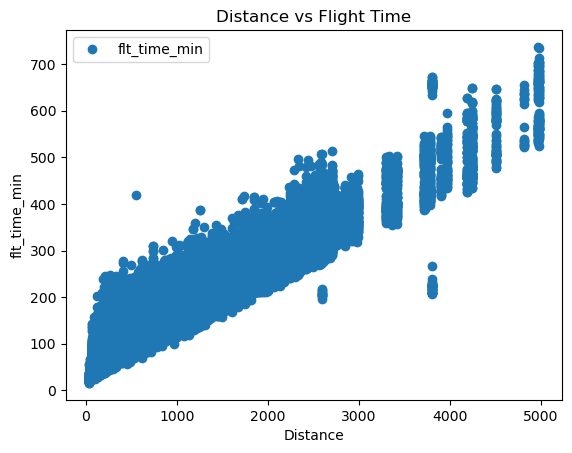

In [240]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

delays_distance.plot(x = 'DISTANCE', y='flt_time_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance vs Flight Time')  
plt.xlabel('Distance')  
plt.ylabel('flt_time_min')  
plt.show()

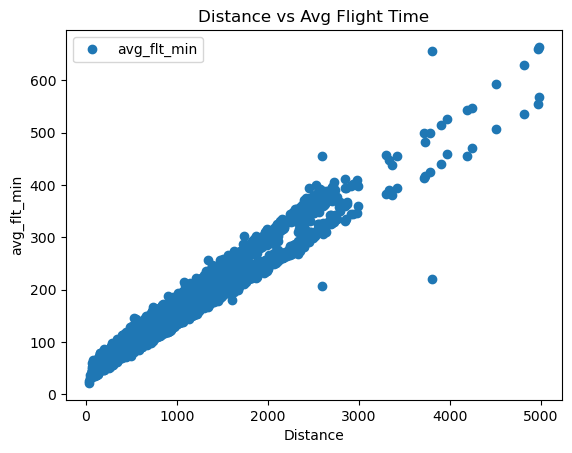

In [286]:
# scatter plot without delay data and average flight time in minutes for every Destination/Origin Flight type

no_delay_flt_lgth.plot(x = 'DISTANCE', y='avg_flt_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance vs Avg Flight Time')  
plt.xlabel('Distance')  
plt.ylabel('avg_flt_min')  
plt.show()

In [278]:
# tool for reviewing outliers
delays.query('flt_time_min >= 300 and DISTANCE <1000')

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR,dep_hour,arr_hour,flt_time_min,ORIGIN/DEST
261364,13,7,YX,YX,N137HQ,4639,ATL,DCA,1721,0.0,1700-1759,20,1.0,547.0,Atlanta,GA,Georgia,5,Washington DC,DC,District of Columbia,5,17,0,419.0,ATLDCA
408415,21,1,B6,B6,N641JB,1097,BOS,ATL,1023,1.0,0900-0959,1544,1.0,946.0,Boston,MA,Massachusetts,5,Atlanta,GA,Georgia,5,10,15,321.0,BOSATL
449353,23,3,AA,AA,N979TW,2621,MKE,DFW,643,0.0,0600-0659,1145,1.0,853.0,Milwaukee,WI,Wisconsin,6,Dallas,TX,Texas,6,6,11,302.0,MKEDFW
462416,24,4,B6,B6,N645JB,376,FLL,PHL,1055,0.0,1000-1059,1603,1.0,992.0,Fort Lauderdale,FL,Florida,5,Philadelphia,PA,Pennsylvania,5,10,16,308.0,FLLPHL
542357,28,1,DL,DL,N936AT,340,LGA,ORD,1625,1.0,1200-1259,2034,1.0,733.0,New York,NY,New York,5,Chicago,IL,Illinois,6,16,20,309.0,LGAORD
542358,28,1,DL,DL,N936AT,340,LGA,ORD,1625,1.0,1200-1259,2034,1.0,733.0,New York,NY,New York,5,Chicago,IL,Illinois,6,16,20,309.0,LGAORD
577322,30,3,B6,B6,N304JB,105,JFK,ORD,1529,0.0,1500-1559,1929,1.0,740.0,New York,NY,New York,5,Chicago,IL,Illinois,6,15,19,300.0,JFKORD
577323,30,3,B6,B6,N304JB,105,JFK,ORD,1529,0.0,1500-1559,1929,1.0,740.0,New York,NY,New York,5,Chicago,IL,Illinois,6,15,19,300.0,JFKORD


### Hypothesis

Flight time and distance increase linearly.

### Training

In [260]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = delays_distance['DISTANCE'].values.reshape(-1,1)
y = delays_distance['flt_time_min'].values.reshape(-1,1)

In [263]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [266]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [267]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

### Applying Model

In [268]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

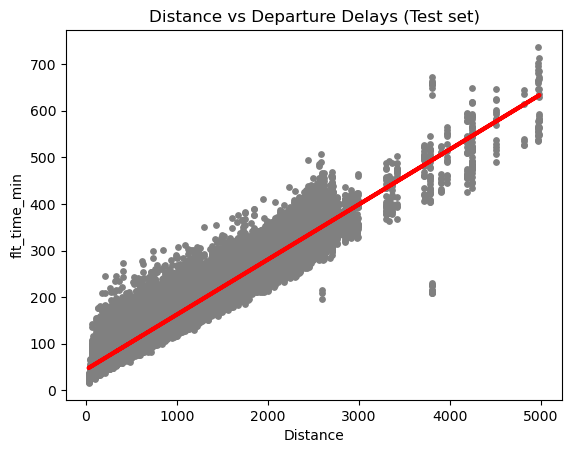

In [269]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance vs Departure Delays (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('flt_time_min')
plot_test.show()

Clearly there is a relationship between the two variables, but the spread along the upward trend has a vast bit of variation.

In [274]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [275]:
# model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11824633]]
Mean squared error:  419.9380374203814
R2 score:  0.9200892511160534


In [276]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,108.0,115.217180
1,84.0,82.462947
2,141.0,151.873542
3,100.0,114.152963
4,125.0,141.349618
5,155.0,157.549365
6,68.0,69.692344
7,184.0,175.286315
8,100.0,96.179521
9,164.0,155.184439


The actual vs predicted seems pretty impressive given that the variation could be 419 but most of the values of actual vs predicted appear to be within 10% of that

In [288]:
delays

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR,dep_hour,arr_hour,flt_time_min,ORIGIN/DEST
0,1,2,9E,9E,N8688C,3280,GNV,ATL,601,0.0,0600-0659,722,0.0,300.0,Gainesville,FL,Florida,5,Atlanta,GA,Georgia,5,6,7,81.0,GNVATL
1,1,2,9E,9E,N348PQ,3281,MSP,CVG,1359,0.0,1400-1459,1633,0.0,596.0,Minneapolis,MN,Minnesota,6,Cincinnati,OH,Ohio,5,13,16,94.0,MSPCVG
2,1,2,9E,9E,N8896A,3282,DTW,CVG,1215,0.0,1200-1259,1329,0.0,229.0,Detroit,MI,Michigan,5,Cincinnati,OH,Ohio,5,12,13,74.0,DTWCVG
3,1,2,9E,9E,N8886A,3283,TLH,ATL,1521,0.0,1500-1559,1625,0.0,223.0,Tallahassee,FL,Florida,5,Atlanta,GA,Georgia,5,15,16,64.0,TLHATL
4,1,2,9E,9E,N8974C,3284,ATL,FSM,1847,0.0,1900-1959,1940,0.0,579.0,Atlanta,GA,Georgia,5,Fort Smith,AR,Arkansas,6,18,19,113.0,ATLFSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612556,31,4,UA,UA,N776UA,200,GUM,HNL,749,0.0,0700-0759,1832,0.0,3801.0,Tamuning,Guam,Guam,10,Honolulu,"Oahu, HI",Hawaii,10,7,18,643.0,GUMHNL
612557,31,4,UA,UA,N36280,174,GUM,SPN,717,0.0,0700-0759,759,0.0,129.0,Tamuning,Guam,Guam,10,Saipan,Northern Mariana Islands,NaN,10,7,7,42.0,GUMSPN
612558,31,4,UA,UA,N36280,117,SPN,GUM,857,0.0,0900-0959,933,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10,8,9,36.0,SPNGUM
612559,31,4,UA,UA,N39726,105,SPN,GUM,1820,0.0,1800-1859,1854,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10,18,18,34.0,SPNGUM


# 05. Exporting

In [289]:
# successful vs cancelled vs diverted flights exporting to .csv
delays.to_csv('/Users/tuor/DA Projects/230523 Airline January 2023 Project/02 Data/Prepared Data/230616 2019 delayed with flight time.csv')